In [0]:
  from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/

drive  sample_data


In [0]:
#%cd /content/drive/My Drive/bama

%cp /content/drive/My\ Drive/bama/npics.zip /content/
%cd /content/

/content


In [0]:
!unzip npics.zip

Archive:  npics.zip
   creating: pics_new/
   creating: pics_new/جک-اس/
  inflating: pics_new/جک-اس/CarImage8547371_0_thumb_450_300.jpeg  
  inflating: pics_new/جک-اس/CarImage8504997_0_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/CarImage8210437_1_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/CarImage8485899_0_thumb_450_300.JPG  
  inflating: pics_new/جک-اس/CarImage8293419_2_thumb_450_300.JPG  
  inflating: pics_new/جک-اس/CarImage8003654_0_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/CarImage8537460_1_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/CarImage8472617_0_thumb_450_300.png  
  inflating: pics_new/جک-اس/CarImage8327624_637122834875414781_1_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/CarImage8490055_0_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/CarImage8545106_2_thumb_450_300.png  
  inflating: pics_new/جک-اس/CarImage8186663_637126418089780269_0_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/CarImage8521018_2_thumb_450_300.jpg  
  inflating: pics_new/جک-اس/Car

In [0]:
import random
import datetime
import json
from keras.applications.inception_v3 import InceptionV3
import os

import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
import cv2
import numpy as np


PATH = "/content/pics_new/"

Using TensorFlow backend.


In [0]:


train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


input_shape = (150,225,3)

inputs = keras.Input(shape=input_shape)
from keras.applications.inception_v3 import InceptionV3

module = InceptionV3(weights='imagenet',include_top = False)
for layer in module.layers[:249]: # [:249]
    layer.trainable = False

x = module(inputs)
f1 = layers.Flatten()(x)
outputs = layers.Dense(40, activation='softmax')(f1)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.01),
              metrics=[keras.metrics.categorical_accuracy])

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
callback2 = keras.callbacks.History()
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=2, min_lr=0.0001)
mc = keras.callbacks.ModelCheckpoint('/content/drive/My Drive/bama/model_newf.h5',
    monitor='loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto')



(150, 225, 3)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 225, 3)       0         
_________________________________________________________________
inception_v3 (Model)         multiple                  21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 30720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1228840   
Total params: 23,031,624
Trainable params: 12,343,720
Non-trainable params: 10,687,904
_________________________________________________________________


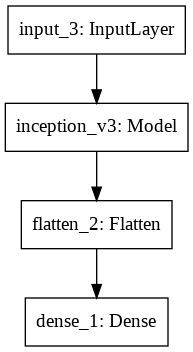

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='/content/model.png')

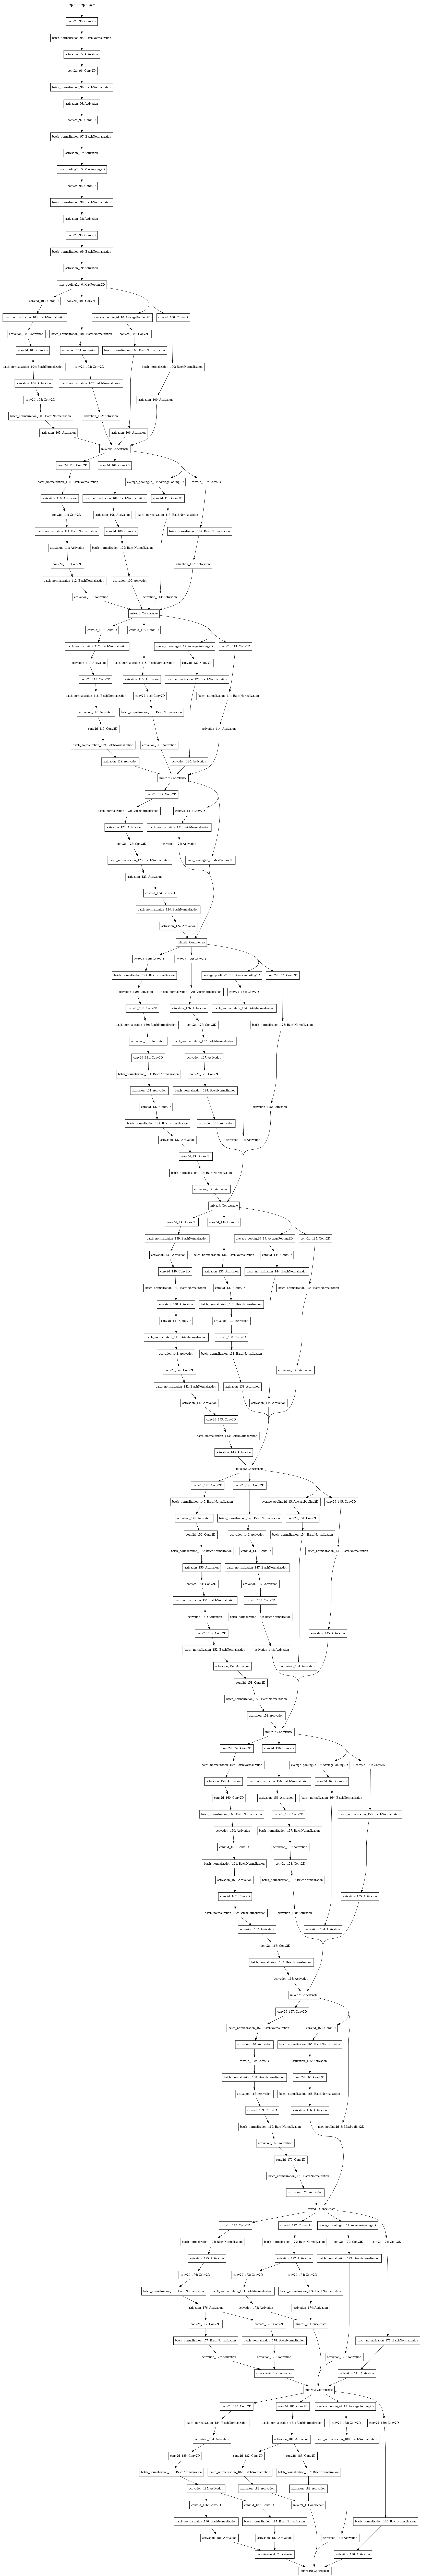

In [0]:
plot_model(module, to_file='/content/inc.png')

In [0]:
# from keras.models import load_model
# !ls /content/drive/My\ Drive/bama/
# model = load_model('/content/drive/My Drive/bama/model_newf.h5')

In [0]:
H = model.fit_generator(train_datagen.flow_from_directory(
    PATH,
    target_size=input_shape[:-1],
    batch_size=10),
    epochs=10000, callbacks=[callback, callback2, reduce_lr, mc])
model.save('/content/drive/My Drive/bama/model_newf_main.h5') 


Found 28410 images belonging to 40 classes.
Epoch 1/10000
2841/2841 [==============================] - 280s 99ms/step - loss: 15.9181 - categorical_accuracy: 0.0121

Epoch 00001: loss improved from inf to 15.91813, saving model to /content/drive/My Drive/bama/model_newf.h5
Epoch 2/10000
2841/2841 [==============================] - 272s 96ms/step - loss: 15.9252 - categorical_accuracy: 0.0120

Epoch 00002: loss did not improve from 15.91813
Epoch 3/10000
2841/2841 [==============================] - 275s 97ms/step - loss: 15.9252 - categorical_accuracy: 0.0120

Epoch 00003: loss did not improve from 15.91813
Epoch 4/10000
2841/2841 [==============================] - 275s 97ms/step - loss: 15.9252 - categorical_accuracy: 0.0120

Epoch 00004: loss did not improve from 15.91813
Epoch 5/10000
2798/2841 [============================>.] - ETA: 4s - loss: 15.9240 - categorical_accuracy: 0.0120

In [0]:
print(H)

In [0]:
model.save('/content/drive/My Drive/bama/model.h5') 

In [0]:

history = H


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
